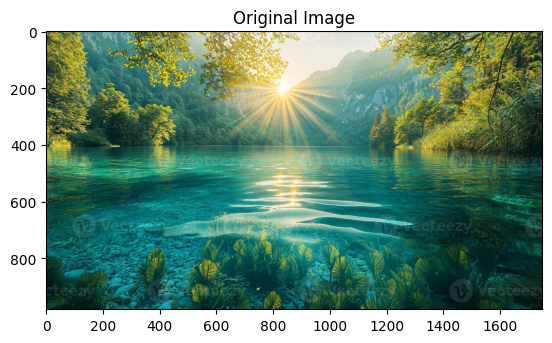

Image Size: 1749x980, Channels: 3
Total Pixels: 1714020


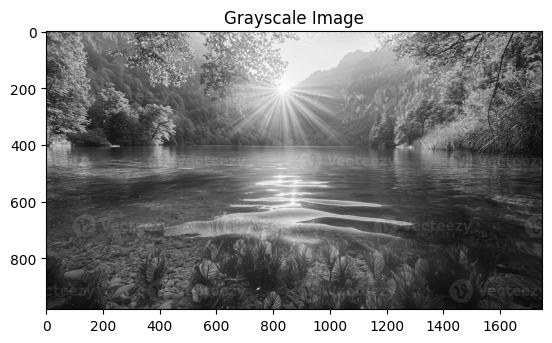

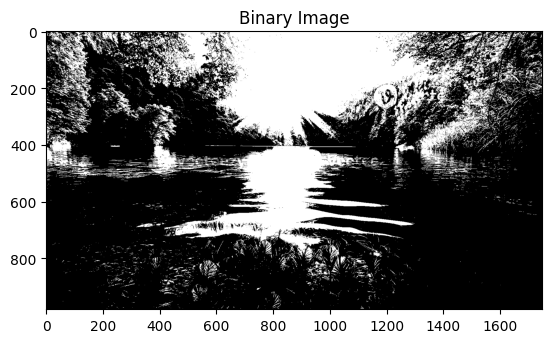

Black Pixel Area: 1207414


In [3]:
import cv2
import numpy as np
from skimage.filters import prewitt, roberts
from skimage.segmentation import watershed
import matplotlib.pyplot as plt

def task_1(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display Image
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.show()

    # Extract image size
    height, width, channels = img.shape
    print(f"Image Size: {width}x{height}, Channels: {channels}")

    # Calculate total pixels
    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")

    # Convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.show()

    # Convert to Binary using Thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    plt.imshow(binary, cmap='gray')
    plt.title("Binary Image")
    plt.show()

    # Count Black Pixels
    black_pixels = np.sum(binary == 0)
    print(f"Black Pixel Area: {black_pixels}")

if __name__ == "__main__":
    image_path = 'test.jpg'  # Change this to your image path
    task_1(image_path)




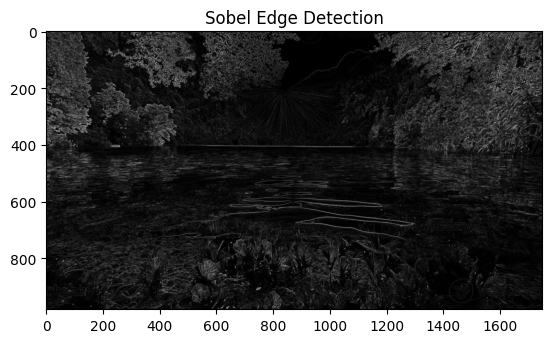

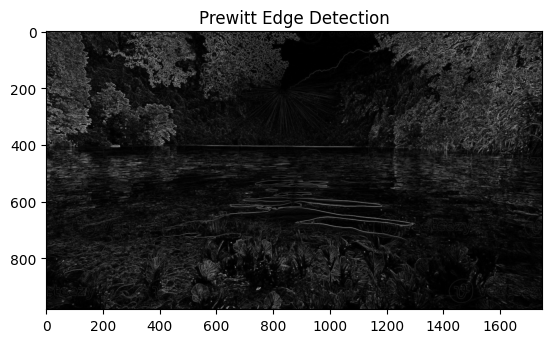

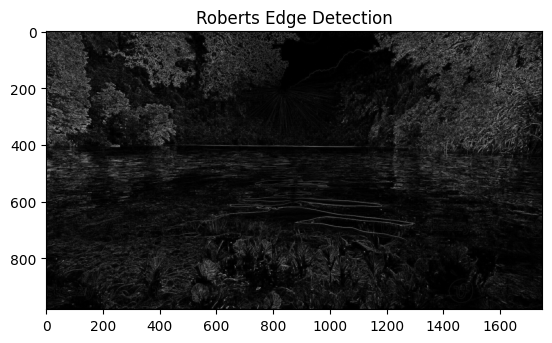

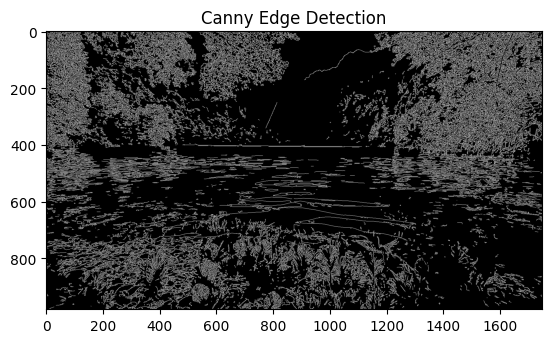

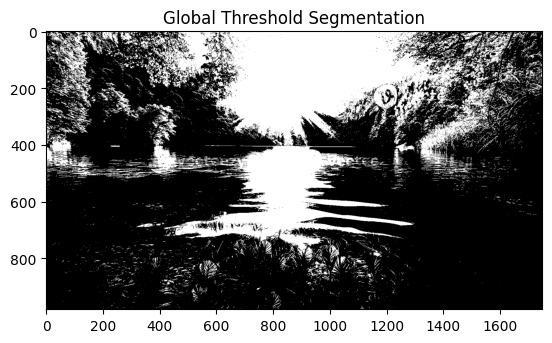

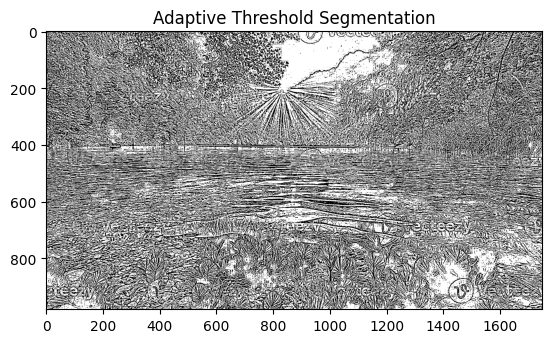

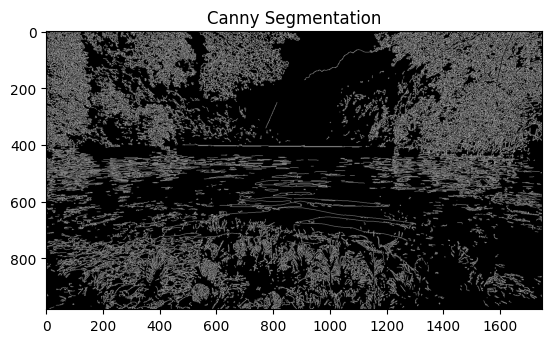

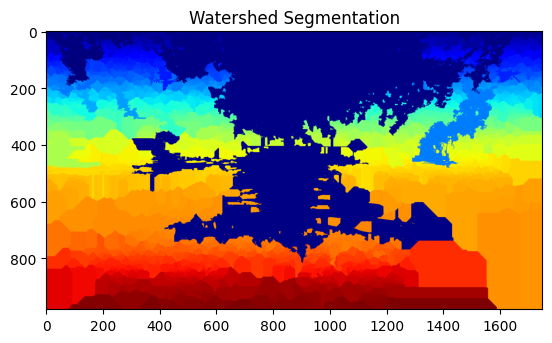

In [4]:
def task_2(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Sobel Edge Detection
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)

    plt.imshow(sobel, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.show()

    # Prewitt Edge Detection
    prewitt_edge = prewitt(img)

    plt.imshow(prewitt_edge, cmap='gray')
    plt.title("Prewitt Edge Detection")
    plt.show()

    # Roberts Cross Edge Detection
    roberts_edge = roberts(img)

    plt.imshow(roberts_edge, cmap='gray')
    plt.title("Roberts Edge Detection")
    plt.show()

    # Canny Edge Detection
    canny_edge = cv2.Canny(img, 100, 200)

    plt.imshow(canny_edge, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.show()

    # Image Segmentation - Global Thresholding
    _, global_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    plt.imshow(global_thresh, cmap='gray')
    plt.title("Global Threshold Segmentation")
    plt.show()

    # Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title("Adaptive Threshold Segmentation")
    plt.show()

    # Canny Edge Detection for Segmentation
    plt.imshow(canny_edge, cmap='gray')
    plt.title("Canny Segmentation")
    plt.show()

    # Region-Based Segmentation (Watershed)
    ret, markers = cv2.connectedComponents(global_thresh)
    markers = watershed(img, markers)
    markers[markers == -1] = 255

    plt.imshow(markers, cmap='jet')
    plt.title("Watershed Segmentation")
    plt.show()

if __name__ == "__main__":
    image_path = 'test.jpg'  # Change this to your image path
    task_2(image_path)